In [7]:
%run config.ipynb #hide sensitive info from git hub 
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
from matplotlib import rcParams

RAPIDAPI_KEY = YOUR_RAPIDAPI_KEY 
POLYAPI_KEY = YOUR_POLYAPI_KEY

In [26]:
def fetchStockData(symbol):
    url = "https://apidojo-yahoo-finance-v1.p.rapidapi.com/market/get-charts"

    querystring = {"symbol":symbol,"interval":"1d","range":"3mo","region":"US","comparisons":"^GDAXI,^FCHI"}

    headers = {
        'x-rapidapi-key': RAPIDAPI_KEY ,
        'x-rapidapi-host': "apidojo-yahoo-finance-v1.p.rapidapi.com"
        }

    response = requests.request("GET", url, headers=headers, params=querystring)


    if(response.status_code == 200):
        return response.json()
    else:
        return "Error"

In [27]:
apple = fetchStockData("aapl")


def parseTimestamp(inputdata):
  timestamplist = []
    #Created timestamplist twice for opening and closing
  timestamplist.extend(inputdata["chart"]["result"][0]["timestamp"])
  timestamplist.extend(inputdata["chart"]["result"][0]["timestamp"])
  
  calendertime = []
  #coverting time stamps to calender dates
  for ts in timestamplist:
    dt = datetime.fromtimestamp(ts)
    calendertime.append(dt.strftime("%m/%d/%Y"))
  return calendertime


def parseValues(inputdata):
  valueList = []
  valueList.extend(inputdata["chart"]["result"][0]["indicators"]["quote"][0]["open"])
  valueList.extend(inputdata["chart"]["result"][0]["indicators"]["quote"][0]["close"])
  return valueList


def attachEvents(inputdata):
  eventlist = []
  for i in range(0,len(inputdata["chart"]["result"][0]["timestamp"])):
    eventlist.append("open")    

  for i in range(0,len(inputdata["chart"]["result"][0]["timestamp"])):
    eventlist.append("close")
  return eventlist

In [28]:
symbol_string = "AAPL"
inputdata = {}
while len(symbol_string) <= 2:
        symbol_string = input("Enter the stock symbol: ")
retdata = fetchStockData(symbol_string)

if (None != inputdata): 
        inputdata["Timestamp"] = parseTimestamp(retdata)
        inputdata["Values"] = parseValues(retdata)
        inputdata["Events"] = attachEvents(retdata)
        df = pd.DataFrame(inputdata)

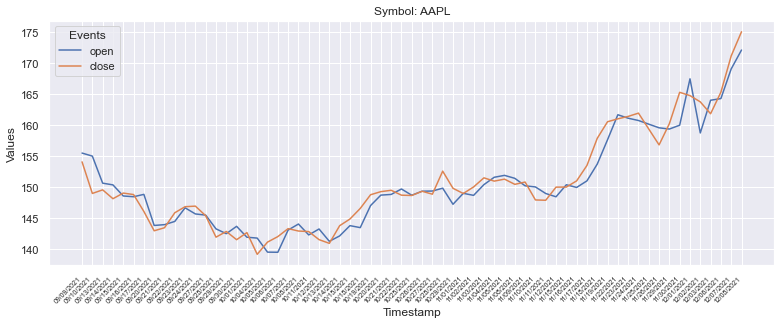

In [30]:
sns.set(style="darkgrid")

rcParams['figure.figsize'] = 13,5
rcParams['figure.subplot.bottom'] = 0.2


ax = sns.lineplot(x="Timestamp", y="Values", hue="Events",dashes=False, markers=True, 
                   data=df, sort=False)


ax.set_title('Symbol: ' + symbol_string)

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='xx-small'  
)

plt.show()b

In [55]:
#Improve data extraction try doing it with pandas library instead
import json
api_s = response.json()

#api_s = json.dumps(response.json())
#df_json = pd.read_json(api_s)
#df_json

#API for all Stock in NYSE & NASDAQ



In [68]:
api_pd = (api_s["chart"]["result"])
api_pd = json.dumps(api_pd)
df_json = pd.read_json(api_pd)
df_json

,meta,timestamp,comparisons,indicators
0,"{'currency': 'USD', 'symbol': 'AAPL', 'exchang...","[1631194200, 1631280600, 1631539800, 163162620...","[{'symbol': '^FCHI', 'high': [6708.33, 6722.73...","{'quote': [{'close': [154.07000732421875, 148...."


In [79]:
meta = api_s["chart"]["result"][0]["meta"]

{'currency': 'USD',
 'symbol': 'AAPL',
 'exchangeName': 'NMS',
 'instrumentType': 'EQUITY',
 'firstTradeDate': 345479400,
 'regularMarketTime': 1638997203,
 'gmtoffset': -18000,
 'timezone': 'EST',
 'exchangeTimezoneName': 'America/New_York',
 'regularMarketPrice': 175.08,
 'chartPreviousClose': 155.11,
 'priceHint': 2,
 'currentTradingPeriod': {'pre': {'timezone': 'EST',
   'start': 1639040400,
   'end': 1639060200,
   'gmtoffset': -18000},
  'regular': {'timezone': 'EST',
   'start': 1639060200,
   'end': 1639083600,
   'gmtoffset': -18000},
  'post': {'timezone': 'EST',
   'start': 1639083600,
   'end': 1639098000,
   'gmtoffset': -18000}},
 'dataGranularity': '1d',
 'range': '3mo',
 'validRanges': ['1d',
  '6mo',
  '5d',
  '1y',
  'ytd',
  '2y',
  '5y',
  '1mo',
  'max',
  '3mo',
  '10y']}

In [97]:
timestamp = api_s["chart"]["result"][0]["timestamp"]
comparison = api_s["chart"]["result"][0]["comparisons"]
print(comparison[0].keys())
comp_dict = {}
for i in comparison[0].keys():
    print(i)
    print(comparison[0][i])
    print()

dict_keys(['symbol', 'high', 'low', 'chartPreviousClose', 'close', 'open'])
symbol
^FCHI

high
[6708.33, 6722.73, 6722.0, 6677.07, 6659.27, 6663.41, 6697.08, 6471.09, 6570.13, 6642.31, 6718.8, 6678.65, 6688.76, 6643.58, 6590.81, 6621.75, 6535.46, 6540.96, 6577.29, 6510.47, 6616.53, 6617.34, 6574.22, 6548.11, 6606.36, 6692.94, 6746.81, 6697.6, 6692.14, 6715.52, 6699.21, 6765.46, 6752.98, 6775.82, 6771.19, 6804.22, 6830.34, 6908.65, 6933.35, 6955.1, 6993.01, 7063.4, 7067.1, 7079.58, 7053.27, 7072.63, 7097.46, 7136.13, 7164.27, 7167.8, 7181.55, 7183.08, 7143.6, 7112.49, 7089.11, 7079.49, 6861.15, 6841.79, 6780.88, 6902.46, 6850.37, 6872.79, 6888.07, 7066.95, 7104.06]

low
[6605.09, 6651.06, 6670.85, 6613.52, 6577.02, 6612.16, 6551.62, 6389.62, 6513.75, 6595.93, 6667.36, 6625.43, 6647.08, 6491.42, 6538.11, 6509.23, 6412.7, 6452.78, 6481.72, 6421.64, 6545.74, 6559.99, 6522.55, 6491.58, 6510.27, 6618.79, 6703.26, 6642.16, 6650.84, 6636.61, 6658.95, 6716.15, 6707.32, 6711.21, 6731.86, 6750.78

In [108]:
indicators = api_s["chart"]["result"][0]["indicators"]
print(indicators["quote"][0]["close"])

indicators = indicators["quote"][0]["close"]
indicators

[154.07000732421875, 148.97000122070312, 149.5500030517578, 148.1199951171875, 149.02999877929688, 148.7899932861328, 146.05999755859375, 142.94000244140625, 143.42999267578125, 145.85000610351562, 146.8300018310547, 146.9199981689453, 145.3699951171875, 141.91000366210938, 142.8300018310547, 141.5, 142.64999389648438, 139.13999938964844, 141.11000061035156, 142.0, 143.2899932861328, 142.89999389648438, 142.80999755859375, 141.50999450683594, 140.91000366210938, 143.75999450683594, 144.83999633789062, 146.5500030517578, 148.75999450683594, 149.25999450683594, 149.47999572753906, 148.69000244140625, 148.63999938964844, 149.32000732421875, 148.85000610351562, 152.57000732421875, 149.8000030517578, 148.9600067138672, 150.02000427246094, 151.49000549316406, 150.9600067138672, 151.27999877929688, 150.44000244140625, 150.80999755859375, 147.9199981689453, 147.8699951171875, 149.99000549316406, 150.0, 151.0, 153.49000549316406, 157.8699951171875, 160.5500030517578, 161.02000427246094, 161.410

154.07000732421875

In [27]:
#Checking out polygon vs rapid api
#Set up class to range data
#BREAK UP URL INTO A FUNCTION TO BE ABLE TO SET CUSTOM RANGES
url = "https://api.polygon.io/v2/aggs/ticker/AAPL/range/10/minute/2021-07-22/2021-07-22?adjusted=true&sort=asc&limit=500&apiKey=" + YOUR_POLYAPI_KEY

payload={}
headers = {}

response = requests.request("GET", url, headers=headers, data=payload)

print(response.text)


{"ticker":"AAPL","queryCount":500,"resultsCount":61,"adjusted":true,"results":[{"v":3511,"vw":145.7741,"o":145.64,"c":145.8,"h":145.85,"l":145.64,"t":1626940800000,"n":113},{"v":1394,"vw":145.7464,"o":145.75,"c":145.75,"h":145.75,"l":145.75,"t":1626941400000,"n":39},{"v":2274,"vw":145.6614,"o":145.73,"c":145.69,"h":145.73,"l":145.6,"t":1626942000000,"n":63},{"v":1053,"vw":145.7038,"o":145.7,"c":145.65,"h":145.71,"l":145.65,"t":1626942600000,"n":38},{"v":1672,"vw":145.6945,"o":145.71,"c":145.65,"h":145.71,"l":145.65,"t":1626943800000,"n":27},{"v":254,"vw":145.6601,"o":145.66,"c":145.66,"h":145.66,"l":145.66,"t":1626944400000,"n":11},{"v":1914,"vw":145.6378,"o":145.65,"c":145.62,"h":145.65,"l":145.62,"t":1626945000000,"n":45},{"v":1277,"vw":145.7033,"o":145.67,"c":145.79,"h":145.79,"l":145.67,"t":1626945600000,"n":44},{"v":895,"vw":145.7246,"o":145.72,"c":145.74,"h":145.74,"l":145.72,"t":1626946200000,"n":11},{"v":2761,"vw":145.7035,"o":145.71,"c":145.72,"h":145.72,"l":145.7,"t":16269468

In [11]:
# Essential staightforward information about stock 
# Add intial buy and will give you your current return of your stock how much you are up 

class Stocks:
    def __init__(self, name, int_price, num_stock, paid):
        self.name = name
        self.int_price = int_price
        self.num_stock = num_stock
        self.paid = paid #what is paid for stock as there is some fees in coinbase etc. 
     
    def stock_info(self):
        string = f"Stock: {self.name}\n Initial Price: {self.int_price} # of stock: {self.num_stock} How much I spent: {self.paid}"
        print(string)
    
    def net_amount(self, curr_price):
        self.curr_price = curr_price
        amount_return = curr_price * self.num_stock
        equity = amount_return - self.paid
        
        
        print(f'you can sell your stock for {amount_return}')
        print(f'if you sell now how much you are making {equity}')
        
        
        
tesla = Stocks("TES", 200, 4, 1000)
tesla.stock_info()
tesla.net_amount(1000)

























Stock: TES
 Initial Price: 200 # of stock: 4 How much I spent: 1000
you can sell your stock for 4000
if you sell now how much you are making 3000


In [22]:
RAPIDAPI_KEY = YOUR_RAPIDAPI_KEY 

{"chart":{"result":[{"meta":{"currency":"USD","symbol":"AAPL","exchangeName":"NMS","instrumentType":"EQUITY","firstTradeDate":345479400,"regularMarketTime":1638565204,"gmtoffset":-18000,"timezone":"EST","exchangeTimezoneName":"America/New_York","regularMarketPrice":161.84,"chartPreviousClose":163.76,"previousClose":163.76,"scale":3,"priceHint":2,"currentTradingPeriod":{"pre":{"timezone":"EST","start":1638522000,"end":1638541800,"gmtoffset":-18000},"regular":{"timezone":"EST","start":1638541800,"end":1638565200,"gmtoffset":-18000},"post":{"timezone":"EST","start":1638565200,"end":1638579600,"gmtoffset":-18000}},"tradingPeriods":[[{"timezone":"EST","start":1638541800,"end":1638565200,"gmtoffset":-18000}]],"dataGranularity":"5m","range":"1d","validRanges":["10y","1mo","ytd","5y","1d","2y","1y","5d","max","3mo","6mo"]},"timestamp":[1638541800,1638542100,1638542400,1638542700,1638543000,1638543300,1638543600,1638543900,1638544200,1638544500,1638544800,1638545100,1638545400,1638545700,163854